# Deep Learning Project
## Convolutional Neural Network for image recognition of chest X-rays to help fighting Covid-19 pandemy. <br>

Author: Piotr Druzdzel <br>
E-mail: piotr.druzdzel@gmail.com <br><br>

Data source: Kaggle <br>
https://www.kaggle.com/praveengovi/coronahack-chest-xraydataset

Coronaviruses are a group of related RNA viruses that cause diseases in mammals and birds. In humans, these viruses cause respiratory tract infections that can range from mild to lethal. Coronaviruses can cause pneumonia (either direct viral pneumonia or secondary bacterial pneumonia) and bronchitis (either direct viral bronchitis or secondary bacterial bronchitis). <br>

Chest X-ray images are one of the important imaging methods that help to discover the presence of the disease.

COVID-19 affects different people in different ways. Most infected people will develop mild to moderate illness and recover without hospitalization.

#### Most common symptoms:
fever, dry cough, tiredness

#### Less common symptoms:
aches and pains, sore throat, diarrhoea, conjunctivitis, headache, loss of taste or smell, a rash on skin, or discolouration of fingers or toes

#### Timing the script:

In [1]:
from datetime import datetime
startTime = datetime.now()

#### Dark theme fix:

In [2]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

#### Basic libraries:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Read the metadata with an overview of available images:

In [4]:
df = pd.read_csv('.\\Chest_xray_Corona_Metadata.csv')
df

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN
...,...,...,...,...,...,...
6192,6215,COVID19_95.jpg,Pnemonia,TEST,COVID-19,Virus
6193,6216,COVID19_96.jpg,Pnemonia,TEST,COVID-19,Virus
6194,6217,COVID19_97.jpg,Pnemonia,TEST,COVID-19,Virus
6195,6218,COVID19_98.jpg,Pnemonia,TEST,COVID-19,Virus


#### Drop 'Unnamed 0' column:
(It does not add any value)

In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)

#### Checking for missing values:

In [6]:
df.isnull().sum()

X_ray_image_name             0
Label                        0
Dataset_type                 0
Label_2_Virus_category    5841
Label_1_Virus_category    1576
dtype: int64

#### Exploring 'Label' column:

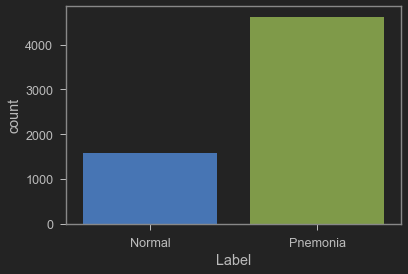

In [7]:
sns.countplot(df['Label']);

#### Dataset type:

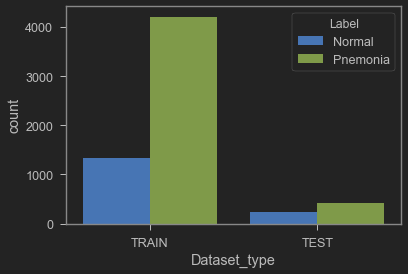

In [8]:
sns.countplot(df['Dataset_type'], hue=df['Label']);

#### Label 1 Virus Category:
No information if the 'Virus' samples pertain to COVID-19:

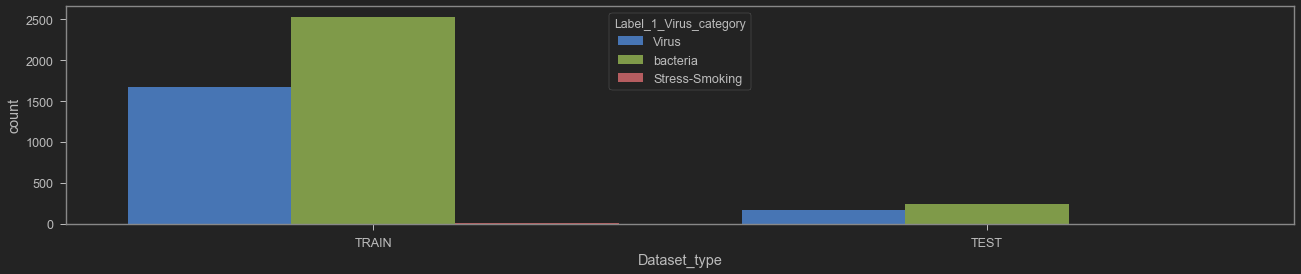

In [9]:
plt.figure(figsize=(22,4))
sns.countplot(df['Dataset_type'], hue=df['Label_1_Virus_category']);

#### Label 2 Virus Category:
No COVID-19 data in the test set:

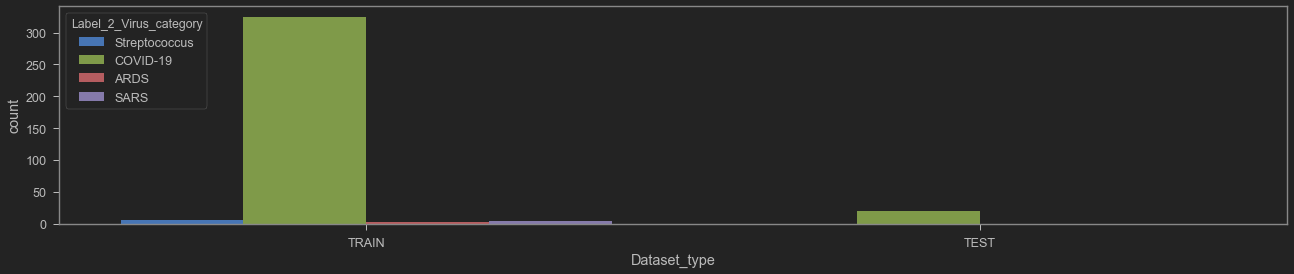

In [10]:
plt.figure(figsize=(22,4))
sns.countplot(df['Dataset_type'], hue=df['Label_2_Virus_category']);

#### No COVID-19 in the Test directory:
Only NaN in the 'Label_2_Virus_category' for the Test set:

In [11]:
df[(df['Dataset_type']=='TEST')]['Label_2_Virus_category'].unique()

array([nan, 'COVID-19'], dtype=object)

In [12]:
df[(df['Dataset_type']=='TEST')]['Label_1_Virus_category'].unique()

array([nan, 'Virus', 'bacteria'], dtype=object)

#### Exploring 'Label 1 Virus Category':

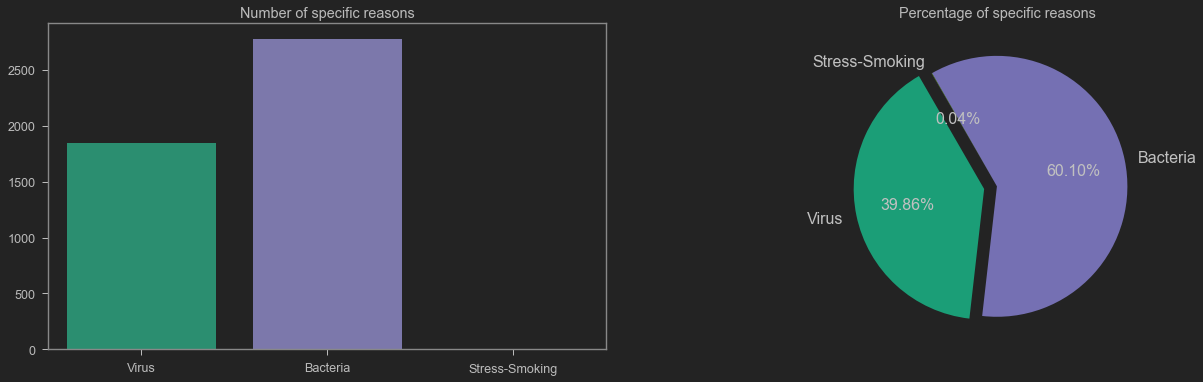

In [13]:
from matplotlib import cm
viridis = cm.get_cmap('viridis', 28) #import colormap

virus    = df[df['Label_1_Virus_category']=='Virus']['Label'].count()            #int
bacteria = df[df['Label_1_Virus_category']=='bacteria']['Label'].count()         #int
stress   = df[df['Label_1_Virus_category']=='Stress-Smoking']['Label'].count()   #int

dark = cm.get_cmap('Dark2') #import colormap
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(22, 6))

axes[0]=plt.subplot(1,2,1)
sns.barplot(y = [virus, bacteria, stress],
            x = ['Virus','Bacteria', 'Stress-Smoking'], 
            palette=dark(np.linspace(0, 2, 8)))
plt.title('Number of specific reasons')

axes[1]=plt.subplot(1,2,2)
plt.pie([virus, bacteria, stress],
        labels = ['Virus','Bacteria', 'Stress-Smoking'],
        autopct = '%1.2f%%',
        textprops={'fontsize': 16, 'color':'silver'},
        startangle = 120,
        explode = [0.1,0,0],
        colors = dark(np.linspace(0, 2, 8)))
plt.title("Percentage of specific reasons")

plt.show()

#### Exploring 'Label 2 Virus Category':

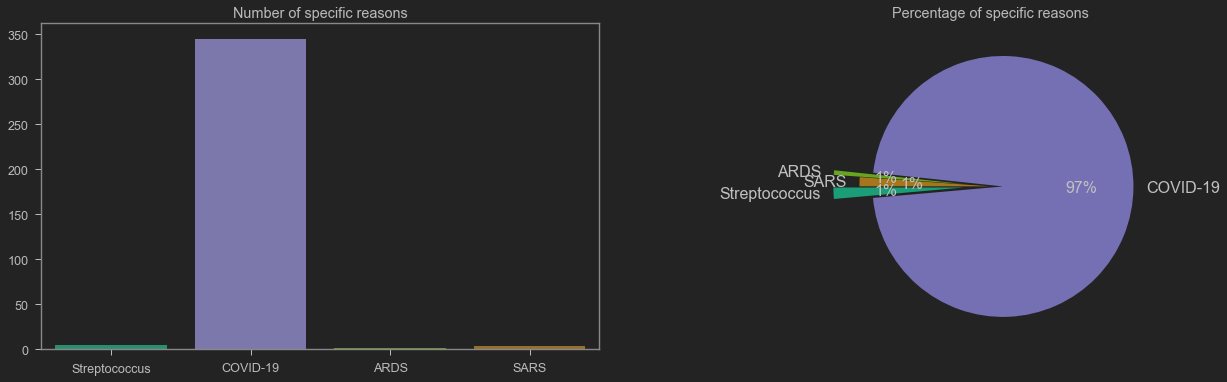

In [14]:
streptococcus = df[df['Label_2_Virus_category']=='Streptococcus']['Label'].count()    #int
covid19       = df[df['Label_2_Virus_category']=='COVID-19']['Label'].count()         #int
ards          = df[df['Label_2_Virus_category']=='ARDS']['Label'].count()             #int
sars          = df[df['Label_2_Virus_category']=='SARS']['Label'].count()             #int

dark = cm.get_cmap('Dark2') #import colormap
fig, axes = plt.subplots(nrows = 1, ncols = 2,figsize=(22, 6))

axes[0]=plt.subplot(1,2,1)
sns.barplot(y = [streptococcus, covid19, ards, sars],
            x = ['Streptococcus','COVID-19', 'ARDS','SARS'], 
            palette=dark(np.linspace(0, 2, 8)))
plt.title('Number of specific reasons')

axes[1]=plt.subplot(1,2,2)
plt.pie([streptococcus, covid19, ards, sars],
        labels = ['Streptococcus','COVID-19', 'ARDS','SARS'],
        autopct = '%1.0f%%',
        textprops={'fontsize': 16, 'color':'silver'},
        startangle = 180,
        explode = [0.2, 0.1, 0.2, 0],
        colors = dark(np.linspace(0, 2, 8)))
plt.title("Percentage of specific reasons")

plt.show()

#### Create 'Path' column
Assign training and test paths with all samples respectively (label-based indexing):

In [15]:
df.loc[df['Dataset_type']=='TRAIN', 'Path'] = '.\\dataset\\train\\all\\'
df.loc[df['Dataset_type']=='TEST', 'Path'] = '.\\dataset\\test\\all\\'
df

,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category,Path
0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN,.\dataset\train\all\
1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN,.\dataset\train\all\
2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN,.\dataset\train\all\
3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN,.\dataset\train\all\
4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN,.\dataset\train\all\
...,...,...,...,...,...,...
6192,COVID19_95.jpg,Pnemonia,TEST,COVID-19,Virus,.\dataset\test\all\
6193,COVID19_96.jpg,Pnemonia,TEST,COVID-19,Virus,.\dataset\test\all\
6194,COVID19_97.jpg,Pnemonia,TEST,COVID-19,Virus,.\dataset\test\all\
6195,COVID19_98.jpg,Pnemonia,TEST,COVID-19,Virus,.\dataset\test\all\


#### Add column with path+unique image name:

In [16]:
df['Image_path'] = df['Path'] + df['X_ray_image_name']
df

,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category,Path,Image_path
0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN,.\dataset\train\all\,.\dataset\train\all\IM-0128-0001.jpeg
1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN,.\dataset\train\all\,.\dataset\train\all\IM-0127-0001.jpeg
2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN,.\dataset\train\all\,.\dataset\train\all\IM-0125-0001.jpeg
3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN,.\dataset\train\all\,.\dataset\train\all\IM-0122-0001.jpeg
4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN,.\dataset\train\all\,.\dataset\train\all\IM-0119-0001.jpeg
...,...,...,...,...,...,...,...
6192,COVID19_95.jpg,Pnemonia,TEST,COVID-19,Virus,.\dataset\test\all\,.\dataset\test\all\COVID19_95.jpg
6193,COVID19_96.jpg,Pnemonia,TEST,COVID-19,Virus,.\dataset\test\all\,.\dataset\test\all\COVID19_96.jpg
6194,COVID19_97.jpg,Pnemonia,TEST,COVID-19,Virus,.\dataset\test\all\,.\dataset\test\all\COVID19_97.jpg
6195,COVID19_98.jpg,Pnemonia,TEST,COVID-19,Virus,.\dataset\test\all\,.\dataset\test\all\COVID19_98.jpg


#### Extracting labelled training data:

In [17]:
df_train = df[(df['Dataset_type']=='TRAIN') & ((df['Label']=='Normal')|(df['Label_2_Virus_category']=='COVID-19'))]
df_train

,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category,Path,Image_path
0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN,.\dataset\train\all\,.\dataset\train\all\IM-0128-0001.jpeg
1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN,.\dataset\train\all\,.\dataset\train\all\IM-0127-0001.jpeg
2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN,.\dataset\train\all\,.\dataset\train\all\IM-0125-0001.jpeg
3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN,.\dataset\train\all\,.\dataset\train\all\IM-0122-0001.jpeg
4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN,.\dataset\train\all\,.\dataset\train\all\IM-0119-0001.jpeg
...,...,...,...,...,...,...,...
6172,COVID19_77.jpg,Pnemonia,TRAIN,COVID-19,Virus,.\dataset\train\all\,.\dataset\train\all\COVID19_77.jpg
6173,COVID19_78.jpg,Pnemonia,TRAIN,COVID-19,Virus,.\dataset\train\all\,.\dataset\train\all\COVID19_78.jpg
6174,COVID19_79.jpg,Pnemonia,TRAIN,COVID-19,Virus,.\dataset\train\all\,.\dataset\train\all\COVID19_79.jpg
6175,COVID19_8.jpg,Pnemonia,TRAIN,COVID-19,Virus,.\dataset\train\all\,.\dataset\train\all\COVID19_8.jpg


#### Training data count:

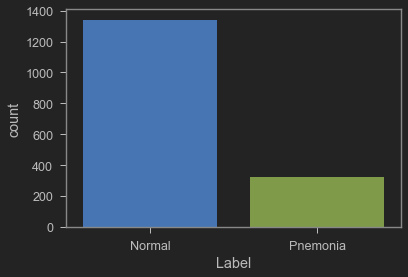

In [18]:
sns.countplot(df_train['Label'], order=['Normal', 'Pnemonia']);

#### Extracting labelled test data:

In [19]:
df_test = df[(df['Dataset_type']=='TEST') & ((df['Label']=='Normal')|(df['Label_2_Virus_category']=='COVID-19'))]
df_test

,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category,Path,Image_path
5286,IM-0021-0001.jpeg,Normal,TEST,NaN,NaN,.\dataset\test\all\,.\dataset\test\all\IM-0021-0001.jpeg
5287,IM-0019-0001.jpeg,Normal,TEST,NaN,NaN,.\dataset\test\all\,.\dataset\test\all\IM-0019-0001.jpeg
5288,IM-0017-0001.jpeg,Normal,TEST,NaN,NaN,.\dataset\test\all\,.\dataset\test\all\IM-0017-0001.jpeg
5289,IM-0016-0001.jpeg,Normal,TEST,NaN,NaN,.\dataset\test\all\,.\dataset\test\all\IM-0016-0001.jpeg
5290,IM-0015-0001.jpeg,Normal,TEST,NaN,NaN,.\dataset\test\all\,.\dataset\test\all\IM-0015-0001.jpeg
...,...,...,...,...,...,...,...
6192,COVID19_95.jpg,Pnemonia,TEST,COVID-19,Virus,.\dataset\test\all\,.\dataset\test\all\COVID19_95.jpg
6193,COVID19_96.jpg,Pnemonia,TEST,COVID-19,Virus,.\dataset\test\all\,.\dataset\test\all\COVID19_96.jpg
6194,COVID19_97.jpg,Pnemonia,TEST,COVID-19,Virus,.\dataset\test\all\,.\dataset\test\all\COVID19_97.jpg
6195,COVID19_98.jpg,Pnemonia,TEST,COVID-19,Virus,.\dataset\test\all\,.\dataset\test\all\COVID19_98.jpg


#### Test data count - problem: only 'heatlhy' samples :

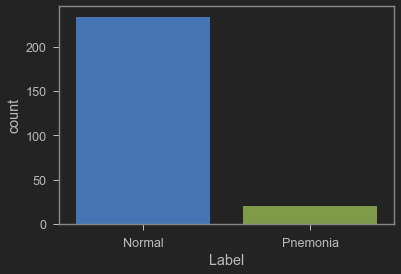

In [20]:
sns.countplot(df_test['Label'], order=['Normal', 'Pnemonia']);

#### The percentage of infected samples:

In [21]:
normal = df_train.loc[:,'Label'].count()
infected = df_train.loc[df_train['Label']=='Pnemonia']['Label'].count()

print(f'In the training set, infected samples take up: {np.round(infected/normal*100, 2)} %')

In the training set, infected samples take up: 19.5 %


10 infected samples in the test set will maintain similar proportion w.r.t training set.
To prevent model from always predicting 'Normal' class and still having high accuracy, let's add more COVID-19 cases to the test set to evaluate its response:

In [22]:
percentage = np.round(10/df_test.loc[df_test['Label']=='Normal']['Label'].count()*100, 2)
print(f'In the test set, infected samples take up: {percentage}%')

In the test set, infected samples take up: 4.27%


#### Moving random Corona-infected samples from Training to Test set:
Select the additional samples from training set and add to the test set.
Then, remove the selected samples from training set.

In [23]:
samples = df[df['Label_2_Virus_category']=='COVID-19'].sample(10)
df_test = pd.concat([samples, df_test], ignore_index=False)

df_train = df_train[~df_train['X_ray_image_name'].isin(samples['X_ray_image_name'])]

#### Re-check the distribution of samples for the Test set:

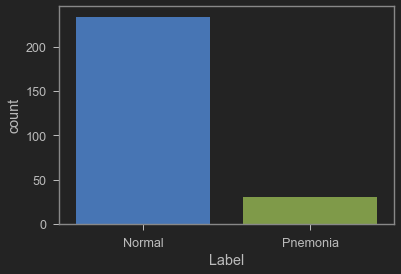

In [24]:
sns.countplot(df_test['Label'], order=['Normal', 'Pnemonia']);

#### Rename 'Pnemonia' to 'COVID-19' labels:

In [25]:
df_train.loc[df_train['Label'] =='Pnemonia', 'Label'] = 'COVID19'
df_test.loc[df_test['Label'] =='Pnemonia', 'Label'] = 'COVID19'

C:\Users\PDL3\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\PDL3\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### The distribution of pre-processed training and test data::

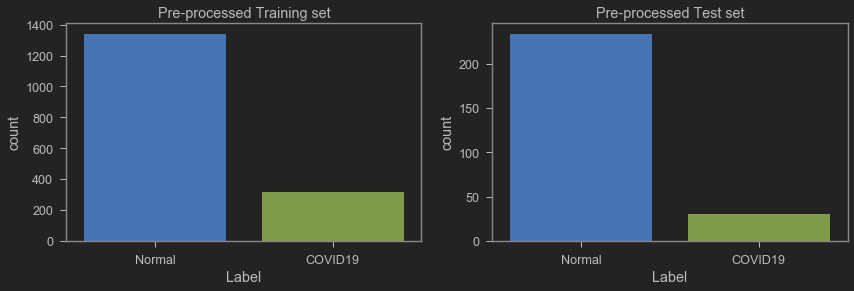

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(14,4))

sns.countplot(df_train['Label'], 
              order=['Normal', 'COVID19'],
              ax=ax[0])

sns.countplot(df_test['Label'], 
              order=['Normal', 'COVID19'],
              ax=ax[1]);

ax[0].title.set_text('Pre-processed Training set')
ax[1].title.set_text('Pre-processed Test set')

#### Exact number of samples in trainig and test sets:

In [27]:
print('Training set:')
print(df_train.groupby(['Label']).agg({'Dataset_type':'count'}))

print('\nTest Set:')
print(df_test.groupby(['Label']).agg({'Dataset_type':'count'}))

Training set:
         Dataset_type
Label                
COVID19           316
Normal           1342

Test Set:
         Dataset_type
Label                
COVID19            30
Normal            234


In [28]:
# Training:            
# COVID19            48
# Normal           1342

# Test:               
# COVID19            10
# Normal            234

#### Creating folder structure:

In [29]:
train_path_normal = '.\\dataset\\train\\classes\\normal\\'
train_path_covid = '.\\dataset\\train\\classes\\covid\\'

test_path_normal = '.\\dataset\\test\\classes\\normal\\'
test_path_covid = '.\\dataset\\test\\classes\\covid\\'

#### Create target paths in the metadata overview DataFrame:

In [30]:
df_train.loc[df_train['Label'] == 'Normal','Target_path'] = train_path_normal
df_train.loc[df_train['Label'] == 'COVID19','Target_path'] = train_path_covid

df_test.loc[df_test['Label'] == 'Normal','Target_path'] = test_path_normal
df_test.loc[df_test['Label'] == 'COVID19','Target_path'] = test_path_covid

C:\Users\PDL3\Anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\PDL3\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\PDL3\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.py

In [31]:
import os
import shutil

paths = [train_path_normal, train_path_covid, test_path_normal, test_path_covid]

for path in paths:
    if not os.path.exists(path):
        os.makedirs(path)
        print(f'Path not present before. Created new: {path}')
    else:
        shutil.rmtree(path) #removes all the subdirectories!
        os.makedirs(path)
        print(f'Path present. Removed the previous content and created new: {path}')

Path present. Removed the previous content and created new: .\dataset\train\classes\normal\
Path present. Removed the previous content and created new: .\dataset\train\classes\covid\
Path present. Removed the previous content and created new: .\dataset\test\classes\normal\
Path present. Removed the previous content and created new: .\dataset\test\classes\covid\


#### Isolated source and target paths for copying training images to their separate folders:

In [32]:
df_train[['Image_path', 'Target_path']]

,Image_path,Target_path
0,.\dataset\train\all\IM-0128-0001.jpeg,.\dataset\train\classes\normal\
1,.\dataset\train\all\IM-0127-0001.jpeg,.\dataset\train\classes\normal\
2,.\dataset\train\all\IM-0125-0001.jpeg,.\dataset\train\classes\normal\
3,.\dataset\train\all\IM-0122-0001.jpeg,.\dataset\train\classes\normal\
4,.\dataset\train\all\IM-0119-0001.jpeg,.\dataset\train\classes\normal\
...,...,...
6172,.\dataset\train\all\COVID19_77.jpg,.\dataset\train\classes\covid\
6173,.\dataset\train\all\COVID19_78.jpg,.\dataset\train\classes\covid\
6174,.\dataset\train\all\COVID19_79.jpg,.\dataset\train\classes\covid\
6175,.\dataset\train\all\COVID19_8.jpg,.\dataset\train\classes\covid\


#### Isolated source and target paths for copying test images to their separate folders:

In [33]:
df_test[['Image_path', 'Target_path']]

,Image_path,Target_path
6072,.\dataset\train\all\COVID19_244.jpg,.\dataset\test\classes\covid\
5980,.\dataset\train\all\COVID19_161.jpg,.\dataset\test\classes\covid\
6062,.\dataset\train\all\COVID19_235.jpg,.\dataset\test\classes\covid\
6184,.\dataset\test\all\COVID19_88.jpg,.\dataset\test\classes\covid\
5271,.\dataset\train\all\1B734A89-A1BF-49A8-A1D3-66...,.\dataset\test\classes\covid\
...,...,...
6192,.\dataset\test\all\COVID19_95.jpg,.\dataset\test\classes\covid\
6193,.\dataset\test\all\COVID19_96.jpg,.\dataset\test\classes\covid\
6194,.\dataset\test\all\COVID19_97.jpg,.\dataset\test\classes\covid\
6195,.\dataset\test\all\COVID19_98.jpg,.\dataset\test\classes\covid\


#### Copy files from /all folder to /train and /covid folders:
Two for loops: training and test dataframes.

In [34]:
for source, destination in df_train[['Image_path', 'Target_path']].itertuples(index=False):
    try:
        shutil.copy(source, destination)
        df_train["Copying"] = 'Successful'
    except:
        print('Failed')
        
for source, destination in df_test[['Image_path', 'Target_path']].itertuples(index=False):
    try:
        shutil.copy(source, destination)
        df_test["Copying"] = 'Successful'
    except:
        print('Failed')

C:\Users\PDL3\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Assert that all rows were copied successfully:

In [35]:
print(f"Copy operations messages for training data: {df_train['Copying'].unique()}")
print(f"Copy operations messages for test data: {df_test['Copying'].unique()}")

Copy operations messages for training data: ['Successful']
Copy operations messages for test data: ['Successful']


#### Sample images for visualization purpose:

In [36]:
sample_train_normal_image = train_path_normal + os.listdir(train_path_normal)[1]
sample_train_covid_image = train_path_covid + os.listdir(train_path_covid)[1]

sample_test_normal_image = test_path_normal + os.listdir(test_path_normal)[1]
sample_test_covid_image = test_path_covid + os.listdir(test_path_covid)[1]

#### Plotting the sample train and test images:

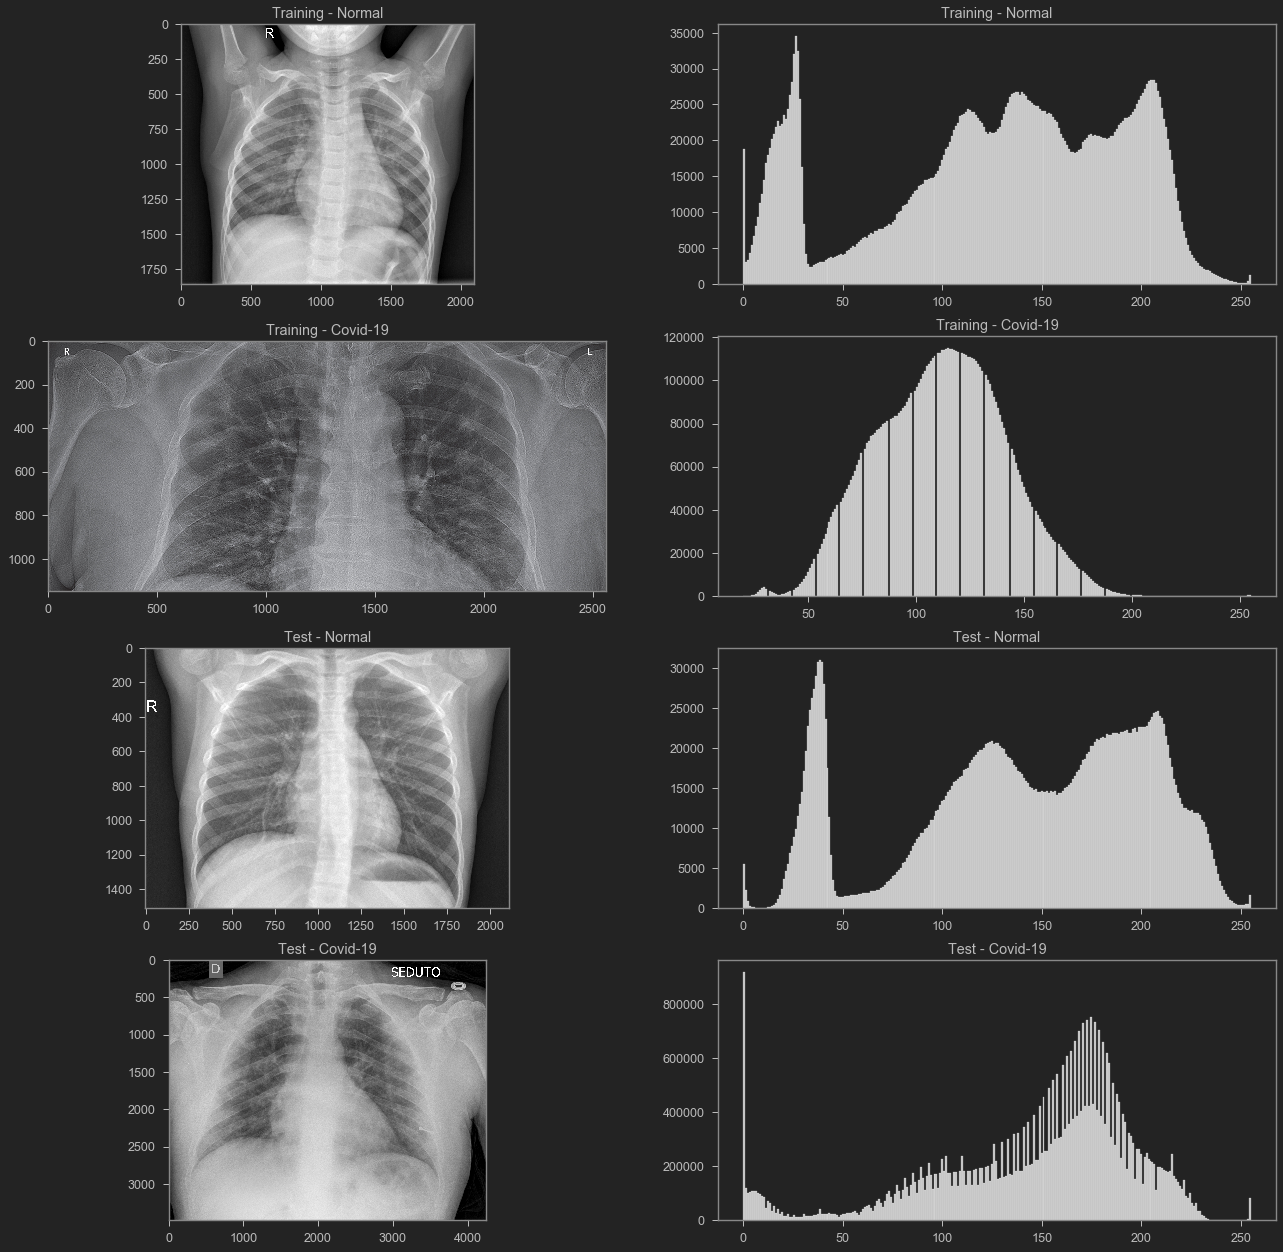

In [37]:
import matplotlib.image as mpimg

img_train_normal = mpimg.imread(sample_train_normal_image)    #Training normal
img_train_covid = mpimg.imread(sample_train_covid_image)      #Training covid

img_test_normal = mpimg.imread(sample_test_normal_image)      #Test normal
img_test_covid = mpimg.imread(sample_test_covid_image)        #Test covid

fig, ax = plt.subplots(4,2, figsize=(22, 22))

#Training normal
ax[0, 0].imshow(img_train_normal, cmap='gray');
ax[0, 0].title.set_text('Training - Normal')

ax[0, 1].hist(img_train_normal.ravel(), bins=256, fc='silver', ec='w');
ax[0, 1].title.set_text('Training - Normal')

#Training covid
ax[1, 0].imshow(img_train_covid, cmap='gray');
ax[1, 0].title.set_text('Training - Covid-19')

ax[1, 1].hist(img_train_covid.ravel(), bins=256, fc='silver', ec='w');
ax[1, 1].title.set_text('Training - Covid-19')

#Test normal
ax[2, 0].imshow(img_test_normal, cmap='gray');
ax[2, 0].title.set_text('Test - Normal')

ax[2, 1].hist(img_test_normal.ravel(), bins=256, fc='silver', ec='w');
ax[2, 1].title.set_text('Test - Normal')

#Test covid
ax[3, 0].imshow(img_test_covid, cmap='gray');
ax[3, 0].title.set_text('Test - Covid-19')

ax[3, 1].hist(img_test_covid.ravel(), bins=256, fc='silver', ec='w');
ax[3, 1].title.set_text('Test - Covid-19')

#### Image augmentation with Keras ImageDataGenerator class:
Image data augmentation is a technique that can be used to artificially expand the size of a training dataset by creating modified versions of images in the dataset. Image data augmentation is typically only applied to the training dataset, and not to the validation or test dataset.

In [38]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    
    rescale = 1./255,              #each pixel 0-1
    brightness_range = [0.9,1.1],  #brightness +/- 10%
    rotation_range = 10,           #rotate
    width_shift_range = 0.1,       #shift the image in the horizontal direction by 10% of its width
    height_shift_range = 0.1,      #shift the image in the vertical direction by 10% of its width
    shear_range = 0.2,             #shear angle in the counter-clockwise direction in degrees
    horizontal_flip = True,        #randomly flips the input image in the horizontal direction
    fill_mode = 'nearest')         #points that exceed the boundary will be processed according to their closest pixels

test_datagen = ImageDataGenerator(rescale = 1./255)

Using TensorFlow backend.


#### Generate batches of tensor image data through real-time data augmentation:
The batch size is a hyperparameter of gradient descent that controls the number of training samples to work through before the model’s internal parameters are updated. <br>

The number of epochs is a hyperparameter of gradient descent that controls the number of complete passes through the training dataset.

In [39]:
print("Traning set: ")
train_iterator = train_datagen.flow_from_directory('.\\dataset\\train\\classes\\', #each class should have its subdirectory
                                                   target_size=(150, 150), 
                                                   batch_size = 32,
                                                   class_mode = 'binary')

print("Test set: ")
test_iterator = test_datagen.flow_from_directory('.\\dataset\\test\\classes\\',
                                                 target_size=(150, 150),
                                                 batch_size = 32,
                                                 class_mode='binary')

Traning set: 
Found 1658 images belonging to 2 classes.
Test set: 
Found 263 images belonging to 2 classes.


#### The results of image augmentation:
10 first examples from the training set.

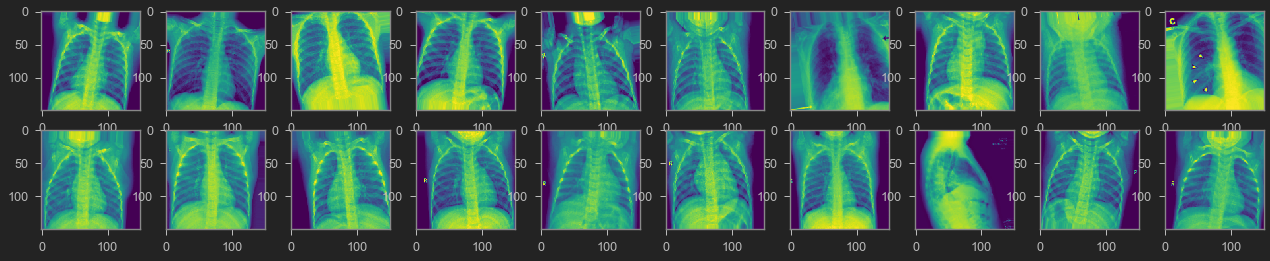

In [40]:
x, y = train_iterator.next()

fig, ax = plt.subplots(2,10, figsize=(22, 4))
ax = ax.ravel() #otherwise axs is a multidim. array that cannot be iterated over

for i in range(20):
    ax[i].imshow(x[i,:,:,0])
plt.show()

#### Building Convolutional Neural Network:

In [41]:
cnn = tf.keras.models.Sequential()

#Convolution
cnn.add(tf.keras.layers.Conv2D(filters = 32,                #number of output filters in the convolution
                               kernel_size = 3,             #convolution window - feature detector size
                               activation = 'relu',         #rectified linear unit to increase the non-linearity of 
                               input_shape = (150,150,3)))  #input tensor: 150 x 150 pixels x 3 channels
#Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,              #pooling window size - as usual: 2x2
                                  strides=2))               #how far the pooling window moves for each pooling step
#Second convolution
cnn.add(tf.keras.layers.Conv2D(filters = 64,
                               kernel_size = 3,
                               activation = 'relu',
                               input_shape = (150,150,3)))
#Second pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,
                                  strides=2))
#Third convolution
cnn.add(tf.keras.layers.Conv2D(filters = 128,
                               kernel_size = 3,
                               activation = 'relu',
                               input_shape = (150,150,3)))
#Third pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,
                                  strides=2))
#Flattening
cnn.add(tf.keras.layers.Flatten())
      
#Full connection
cnn.add(tf.keras.layers.Dense(units=128,
                              activation='relu'))
#Dropout layer
cnn.add(tf.keras.layers.Dropout(rate=0.5)) #switch off 50% of the neurons for each batch of training to prevent overfitting
        
#Output layer
cnn.add(tf.keras.layers.Dense(units=1,
                              activation='sigmoid'))
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

#### Compiling the CNN:

In [42]:
cnn.compile(optimizer ='adam',            #Adaptive Moment Estimation - includes momentum
            loss='binary_crossentropy',   #two classes: Normal and COVID19
            metrics = ['accuracy'])             

#### Callbacks: Earlystopping

In [43]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',
                           mode='min',             #minimazing the validation loss, 'auto' usually works fine too
                           verbose=2,              #print feedback with the progress
                           patience=25)            #number of epochs to still do after detecting the stopping point

## <span style="color:Yellow">Training the model:</span>
(25 epochs take ~38 minutes)

In [44]:
cnn.fit(train_iterator,
        steps_per_epoch = train_iterator.samples//32, #floor division: samples/batch size
        epochs = 100,
        validation_data = test_iterator,
        validation_steps = test_iterator.samples//32,
        callbacks = [early_stop])

Epoch 1/100
51/51 [==============================] - 113s 2s/step - loss: 0.3618 - accuracy: 0.8610 - val_loss: 0.2513 - val_accuracy: 0.8789
Epoch 2/100
51/51 [==============================] - 109s 2s/step - loss: 0.1823 - accuracy: 0.9397 - val_loss: 0.2053 - val_accuracy: 0.8984
Epoch 3/100
51/51 [==============================] - 120s 2s/step - loss: 0.1360 - accuracy: 0.9533 - val_loss: 0.1068 - val_accuracy: 0.9492
Epoch 4/100
51/51 [==============================] - 107s 2s/step - loss: 0.1057 - accuracy: 0.9600 - val_loss: 0.2149 - val_accuracy: 0.8906
Epoch 5/100
51/51 [==============================] - 117s 2s/step - loss: 0.1075 - accuracy: 0.9606 - val_loss: 0.0869 - val_accuracy: 0.9766
Epoch 6/100
51/51 [==============================] - 117s 2s/step - loss: 0.0885 - accuracy: 0.9711 - val_loss: 0.1050 - val_accuracy: 0.9570
Epoch 7/100
51/51 [==============================] - 106s 2s/step - loss: 0.1010 - accuracy: 0.9637 - val_loss: 0.1054 - val_accuracy: 0.9570
Epoch 

51/51 [==============================] - 116s 2s/step - loss: 0.0295 - accuracy: 0.9871 - val_loss: 0.0498 - val_accuracy: 0.9805
Epoch 59/100
51/51 [==============================] - 113s 2s/step - loss: 0.0252 - accuracy: 0.9902 - val_loss: 0.0518 - val_accuracy: 0.9766
Epoch 60/100
51/51 [==============================] - 107s 2s/step - loss: 0.0292 - accuracy: 0.9883 - val_loss: 0.0614 - val_accuracy: 0.9727
Epoch 61/100
51/51 [==============================] - 104s 2s/step - loss: 0.0151 - accuracy: 0.9945 - val_loss: 0.0615 - val_accuracy: 0.9727
Epoch 62/100
51/51 [==============================] - 104s 2s/step - loss: 0.0247 - accuracy: 0.9926 - val_loss: 0.0724 - val_accuracy: 0.9844
Epoch 63/100
51/51 [==============================] - 109s 2s/step - loss: 0.0260 - accuracy: 0.9920 - val_loss: 0.0421 - val_accuracy: 0.9844
Epoch 64/100
51/51 [==============================] - 111s 2s/step - loss: 0.0332 - accuracy: 0.9902 - val_loss: 0.0463 - val_accuracy: 0.9805
Epoch 65/100

#### Create the directory to save the entire model:

In [45]:
path = '.\\Saved_Model\\'
    
if not os.path.exists(path):
    os.makedirs(path)
    print(f'Path not present before. Created new: {path}')
else:
    print(f'Path present.')

Path present.


#### Create unique timestamp:

In [46]:
import time

t = time.localtime()
timestamp = time.strftime('%d-%b-%Y_%H%M', t)
timestamp

'21-Jun-2020_1619'

#### Save the model as h5:

In [47]:
model_path = path+'CNN_Model_'+timestamp+'.h5' #save to HDF5 format
cnn.save(model_path)

#### Save the history as CSV:

In [48]:
model_history_path = path+'CNN_Model_History_'+timestamp+'.csv'
pd.DataFrame.from_dict(cnn.history.history).to_csv(model_history_path, index=False)

#### Load the just-saved model:
Note: now the loaded model will not have the attribute 'history'. The history is saved in the 'CNN_Model_History_ ...' csv file.

In [49]:
from tensorflow.keras.models import load_model
cnn = load_model(model_path)

#### Metrics history per batch:
DataFrame containing: Accuracy, Validation Accuracy, Loss, Validation Loss

In [50]:
#model_history = pd.DataFrame(cnn.history.history) #initial way, without separate model and history saving
model_history = pd.read_csv(model_history_path)

#### Load specific model with its history:

In [51]:
# model_path = '.\\Saved_Model\\CNN_Model_20-Jun-2020_1847.h5'
# model_history_path = '.\\Saved_Model\\CNN_Model_History_20-Jun-2020_1847.csv'

# cnn = load_model(model_path)
# model_history = pd.read_csv(model_history_path)

#### Model accuracy:

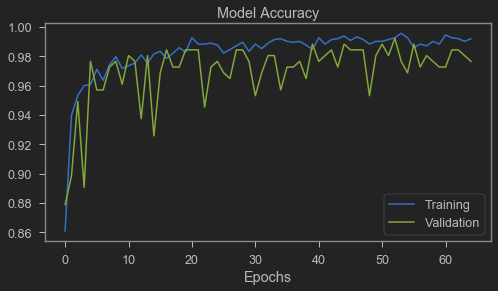

In [52]:
plt.figure(figsize=(8,4))
plt.plot(model_history['accuracy'], label='Training');
plt.plot(model_history['val_accuracy'], label='Validation');
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.title('Model Accuracy')
plt.show()

#### Model loss:

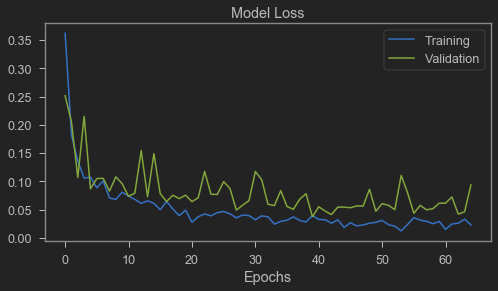

In [53]:
plt.figure(figsize=(8,4))
plt.plot(model_history['loss'], label='Training');
plt.plot(model_history['val_loss'], label='Validation');
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.title('Model Loss')
plt.show()

#### Predictions:

In [54]:
predictions = cnn.predict(test_iterator)

#### Class names:

In [55]:
test_iterator.class_indices

{'covid': 0, 'normal': 1}

#### Rounding predictions between 0 and 1 to integers and counting:

In [62]:
predictions_series = pd.Series(np.round(predictions.flatten(),0))
predictions_series.value_counts()

1.0    230
0.0     33
dtype: int64

#### Confusion matrix:

In [57]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(test_iterator.classes, predictions_series))

[[  4  25]
 [ 29 205]]


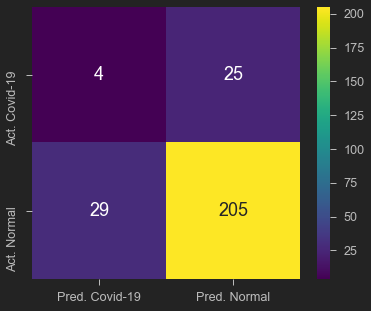

In [58]:
plt.figure(figsize = (6,5))
sns.heatmap(confusion_matrix(test_iterator.classes, predictions_series), 
            cmap='viridis',
            annot=True, fmt="d", annot_kws={'size':18},
            xticklabels = ['Pred. Covid-19', 'Pred. Normal'],
            yticklabels = ['Act. Covid-19', 'Act. Normal']);

#### Classification report:

In [59]:
print(classification_report(test_iterator.classes, predictions_series, target_names=['Covid-19', 'Normal']))

              precision    recall  f1-score   support

    Covid-19       0.12      0.14      0.13        29
      Normal       0.89      0.88      0.88       234

    accuracy                           0.79       263
   macro avg       0.51      0.51      0.51       263
weighted avg       0.81      0.79      0.80       263



Total time:

In [60]:
print(datetime.now() - startTime)

2:00:39.638769
